# RC circuit design analysis

This example shows how to use PyAEDT to create a Twin Builder design
and run a Twin Builder time-domain simulation.

Keywords: **Twin Builder**, **RC**.

## Perform imports and define constantss

Perform required imports.

In [1]:
import os
import tempfile
import time

import ansys.aedt.core

Define constants.

In [2]:
AEDT_VERSION = "2025.2"
NUM_CORES = 4
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Launch Twin Builder

Launch Twin Builder using an implicit declaration and add a new design with
a default setup.

In [4]:
project_name = os.path.join(temp_folder.name, "rc_circuit.aedt")
tb = ansys.aedt.core.TwinBuilder(
    project=project_name,
    version=AEDT_VERSION,
    non_graphical=NG_MODE,
    new_desktop=True,
)
tb.modeler.schematic_units = "mil"

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.25.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_f2a6170f-e071-47ac-95a5-05c94bcd7607.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


PyAEDT INFO: 2025.2 version started with process ID 6896.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Project rc_circuit has been created.


PyAEDT INFO: No design is present. Inserting a new design.


PyAEDT INFO: Added design 'Twin Builder_PVH' of type Twin Builder.


PyAEDT INFO: Aedt Objects correctly read


PyAEDT INFO: ModelerCircuit class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: ModelerTwinBuilder class has been initialized!


## Create components for RC circuit

Create components for an RC circuit driven by a pulse voltage source.
Create components, such as a voltage source, resistor, and capacitor.

In [5]:
source = tb.modeler.schematic.create_voltage_source("E1", "EPULSE", 10, 10, [0, 0])
resistor = tb.modeler.schematic.create_resistor("R1", 10000, [1000, 1000], 90)
capacitor = tb.modeler.schematic.create_capacitor("C1", 1e-6, [2000, 0])

## Create ground

Create a ground, which is needed for an analog analysis.

In [6]:
gnd = tb.modeler.components.create_gnd([0, -1000])

## Connect components

Connects components with pins.

In [7]:
source.pins[1].connect_to_component(resistor.pins[0])
resistor.pins[1].connect_to_component(capacitor.pins[0])
capacitor.pins[1].connect_to_component(source.pins[0])
source.pins[0].connect_to_component(gnd.pins[0])

(True,
 Class: ansys.aedt.core.modeler.circuits.object_3d_circuit.CircuitComponent,
 Class: ansys.aedt.core.modeler.circuits.object_3d_circuit.CircuitComponent)

## Parametrize transient setup

Parametrize the default transient setup by setting the end time.

In [8]:
tb.set_end_time("300ms")

True

## Solve transient setup

In [9]:
tb.analyze_setup("TR")

PyAEDT INFO: Solving design setup TR


PyAEDT INFO: Design setup TR solved correctly in 0.0h 0.0m 11.0s


True

## Get report data and plot using Matplotlib

Get report data and plot it using Matplotlib. The following code gets and plots
the values for the voltage on the pulse voltage source and the values for the
voltage on the capacitor in the RC circuit.

In [10]:
E_Value = "E1.V"
C_Value = "C1.V"

PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT WARNING: No report category provided. Automatically identified Standard


PyAEDT INFO: Solution Data Correctly Loaded.


Time to initialize solution data:0.006302356719970703
Time to initialize solution data:0.006302356719970703


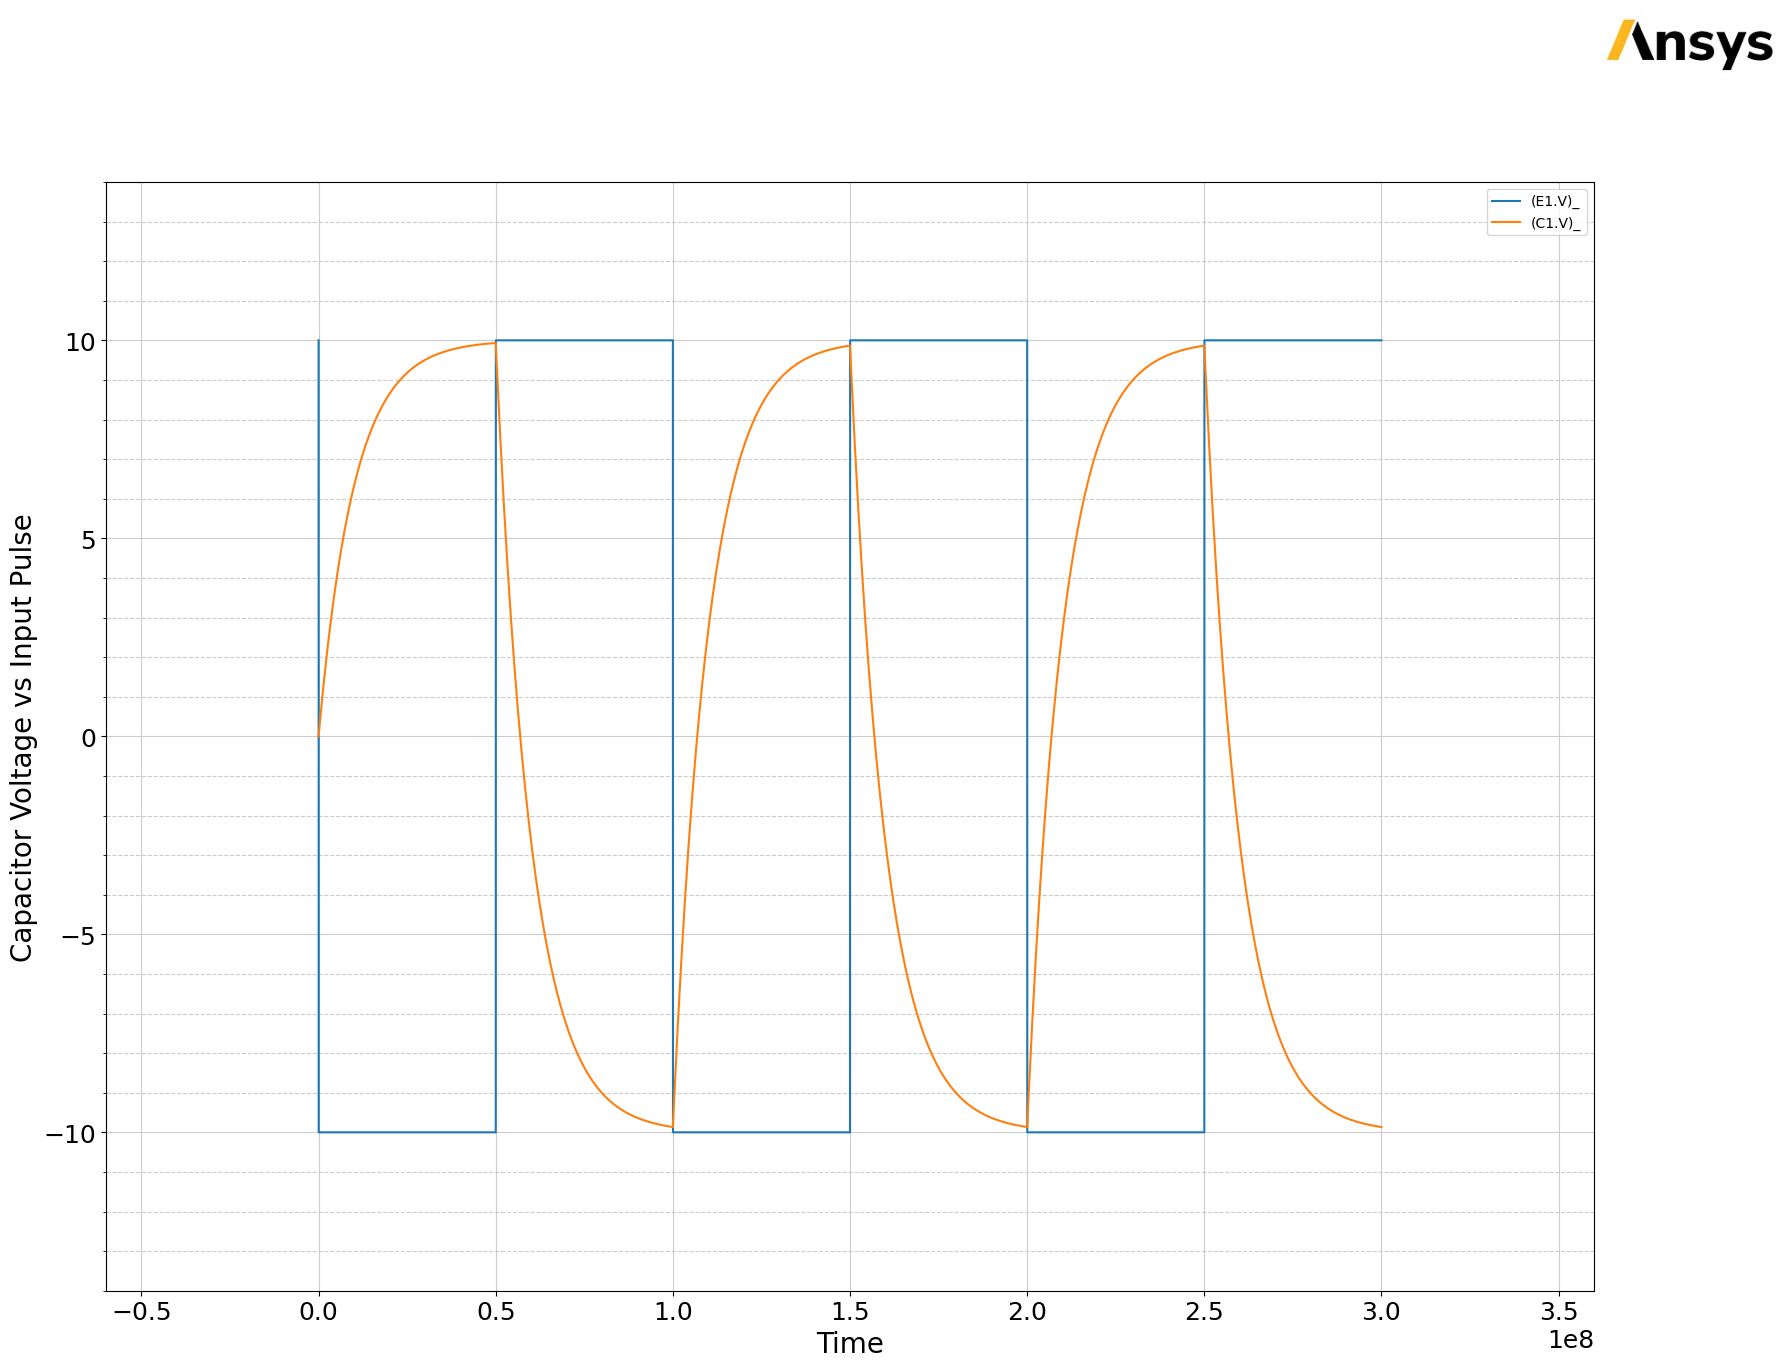

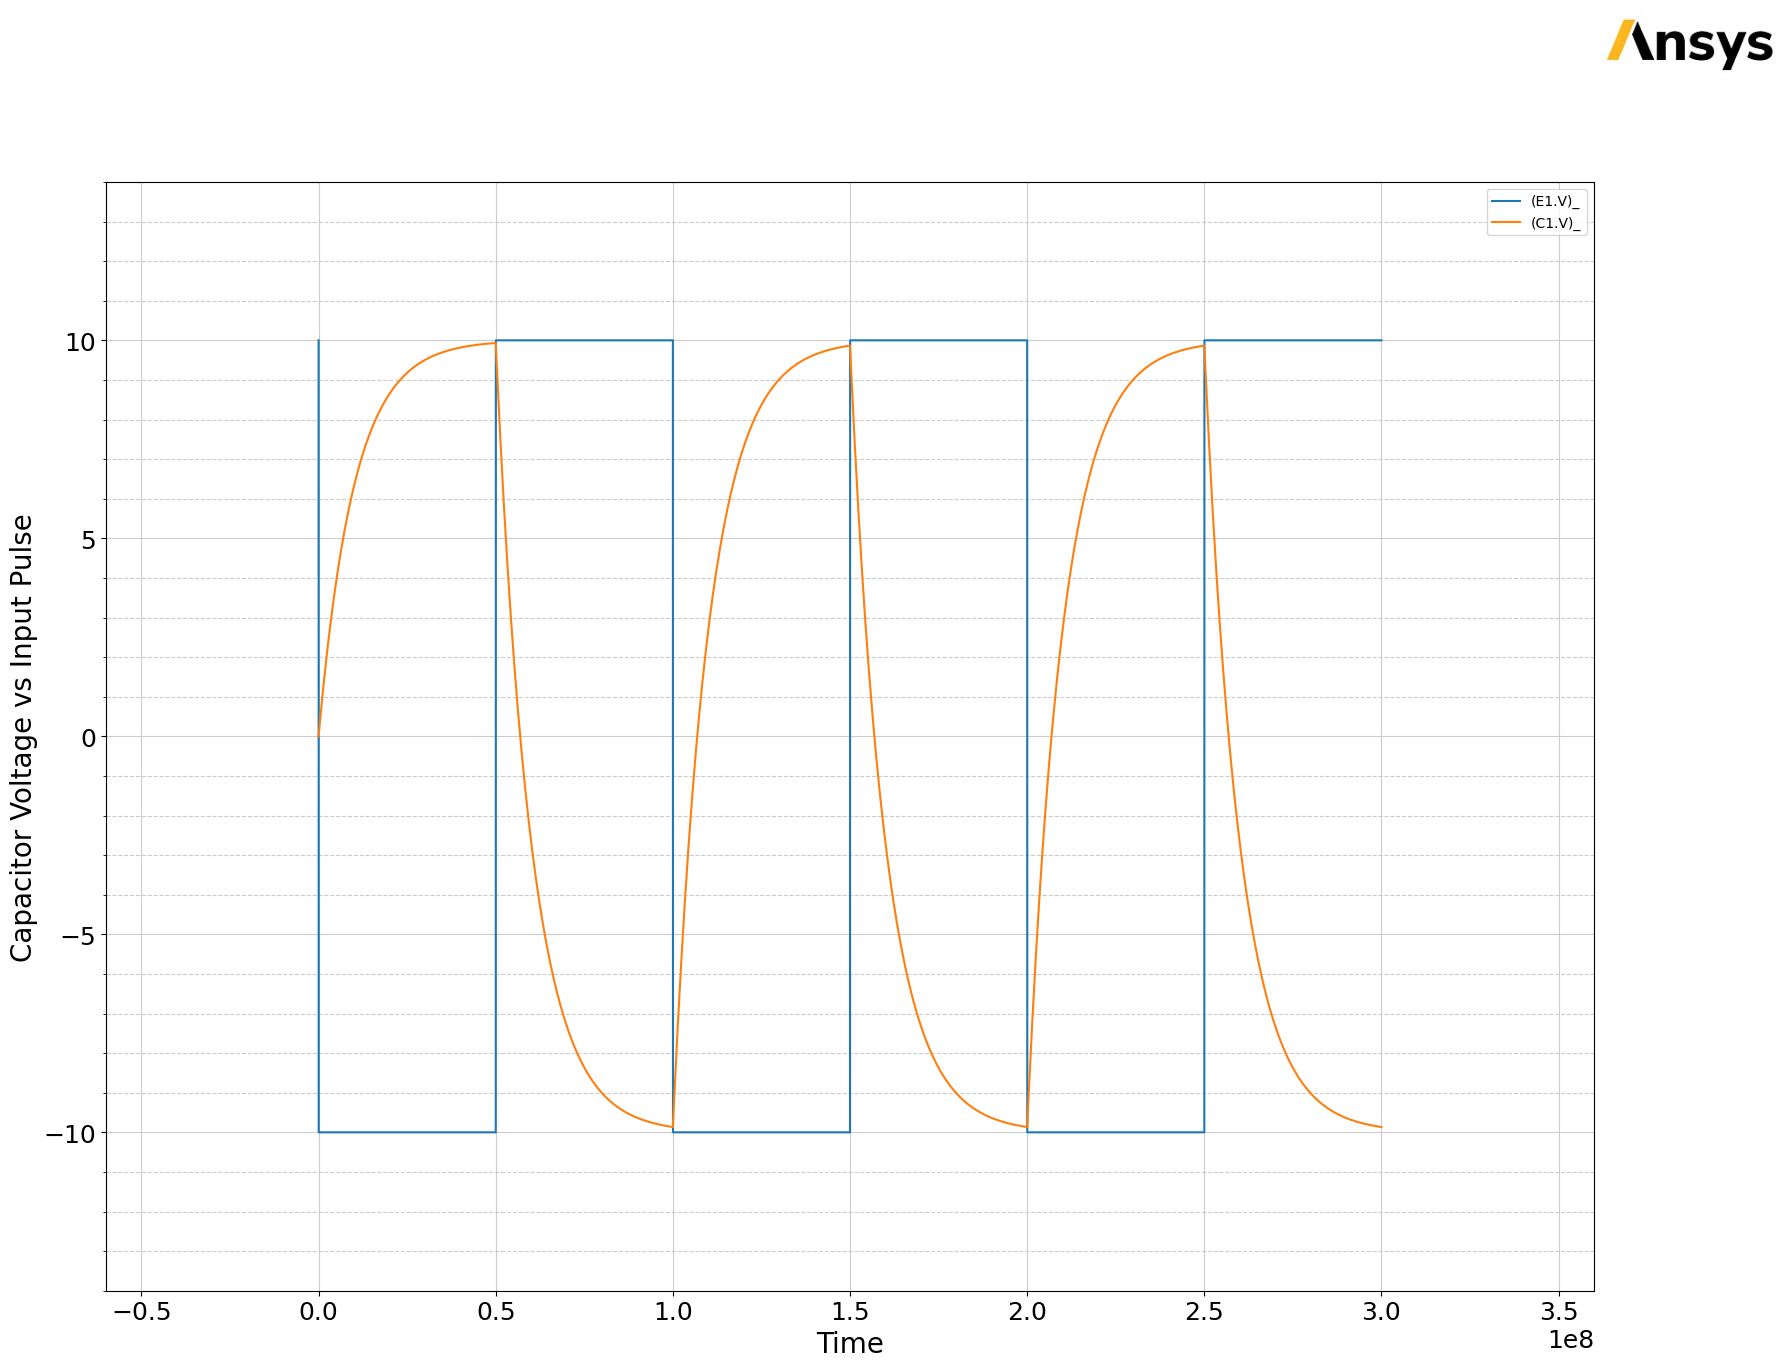

In [11]:
x = tb.post.get_solution_data([E_Value, C_Value], "TR", "Time")
x.plot([E_Value, C_Value], x_label="Time", y_label="Capacitor Voltage vs Input Pulse")

## Release AEDT

Release AEDT and close the example.

In [12]:
tb.save_project()
tb.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project rc_circuit Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``. If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell removes all temporary files, including the project folder.

In [13]:
temp_folder.cleanup()